In [12]:
from kineticEQ import BGK1DPlot

config_cross_test = {
    "ho_iter": 4096,
    "lo_iter": 4096,
    "ho_tol": 1e-5,
    "lo_tol": 1e-2,
    "picard_iter": 4096,
    "picard_tol": 1e-5,
    "Con_Terms_do": True,
    "flux_consistency_do": False,

    "tau_tilde": 5e-7,
    "nx": 500,
    "nv": 200,
    "v_max": 10.0,
    "T_total": 0.05,
    "device": "cuda",
    "use_tqdm": True,
    "ic_fn": None,
    "initial_regions": [
        {"x_range": (0.0, 0.5), "n": 1.0, "u": 0.0, "T": 1.0},
        {"x_range": (0.5, 1.0), "n": 0.125, "u": 0.0, "T": 0.8}
    ],
    "n_left": 1.0,
    "u_left": 0.0,
    "T_left": 1.0,
    "n_right": 0.125,
    "u_right": 0.0,
    "T_right": 0.8,
    "dtype": "float64"
}

sim_cross = BGK1DPlot(**config_cross_test)

--- auto compile ---
--- auto compile complete ---
initiaze complete:
  solver: None
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-07
 ---- space ----
  space: nx=500, dx=0.0020, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=6, dt=0.0100, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


In [13]:
results = sim_cross.run_scheme_comparison_test(scheme_list=["explicit", "implicit", "holo"], scheme_delta_t_list=[5e-7, 5e-4, 5e-4])
sim_cross.save_benchmark_results(results, "cross_test.pkl")

No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
No modifications detected for re-loaded extension module explicit_fused, skipping build step...
Loading extension module explicit_fused...
NoneType: None
No modifications detected for re-loaded extension module implicit_fused, skipping build step...
Loading extension module implicit_fused...
NoneType: None
No modifications detected for re-loaded extension module lo_blocktridiag, skipping build step...
Loading extension module lo_blocktridiag...
NoneType: None


--- compile cuSOLVER ---
--- compile CUDA fused explicit backend ---
--- fused CUDA backend loaded ---
--- compile CUDA fused implicit backend ---
--- fused CUDA backend loaded ---
--- compile LO block-tridiag backend ---
--- LO block-tridiag backend loaded ---
Running scheme comparison test with schemes: ['explicit', 'implicit', 'holo']
Time step sizes: [5e-07, 0.0005, 0.0005]
  Running explicit scheme (dt=5e-07)
--- explicit ---


Progress(explicit): 100%|██████████| 100001/100001 [00:13<00:00, 7646.17it/s]


  Running implicit scheme (dt=0.0005)
--- implicit ---


Progress(implicit): 100%|██████████| 101/101 [00:17<00:00,  5.82it/s]


  Running HOLO scheme (dt=0.0005)
--- HOLO ---


Progress(HOLO): 100%|██████████| 101/101 [00:00<00:00, 104.41it/s]

ベンチマーク結果を保存: cross_test.pkl  (2.32 MB)


'cross_test.pkl'

ベンチマーク結果を読み込み: cross_test.pkl  (meta: {'saved_at': '2025-12-05T08:21:30', 'hostname': 'arlm-ASUS-TUF-Gaming-A15-FA506QR', 'torch_version': '2.7.1+cu126', 'device': 'cuda', 'dtype': 'torch.float64', 'solver': None})


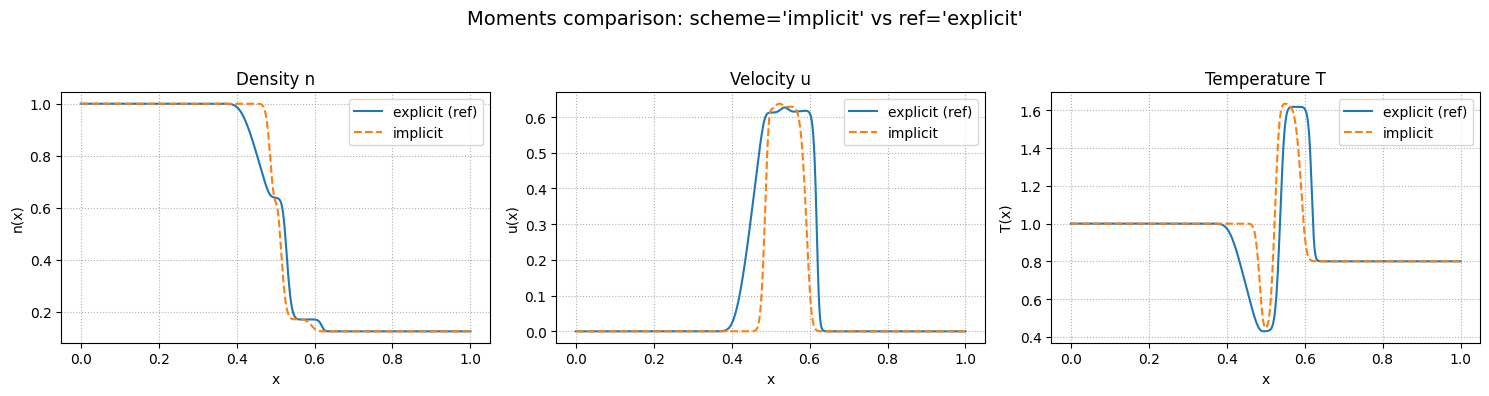

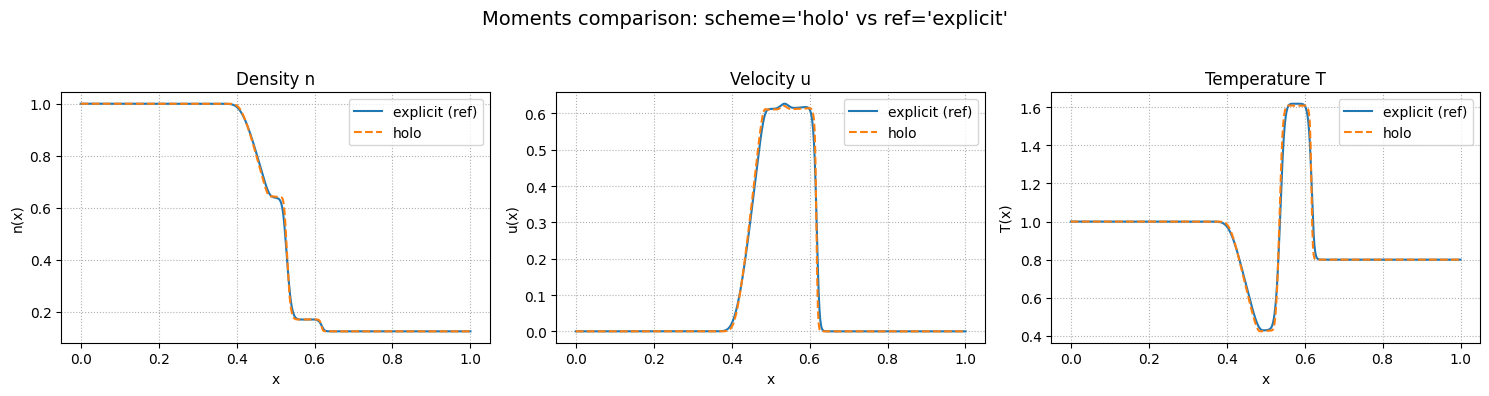

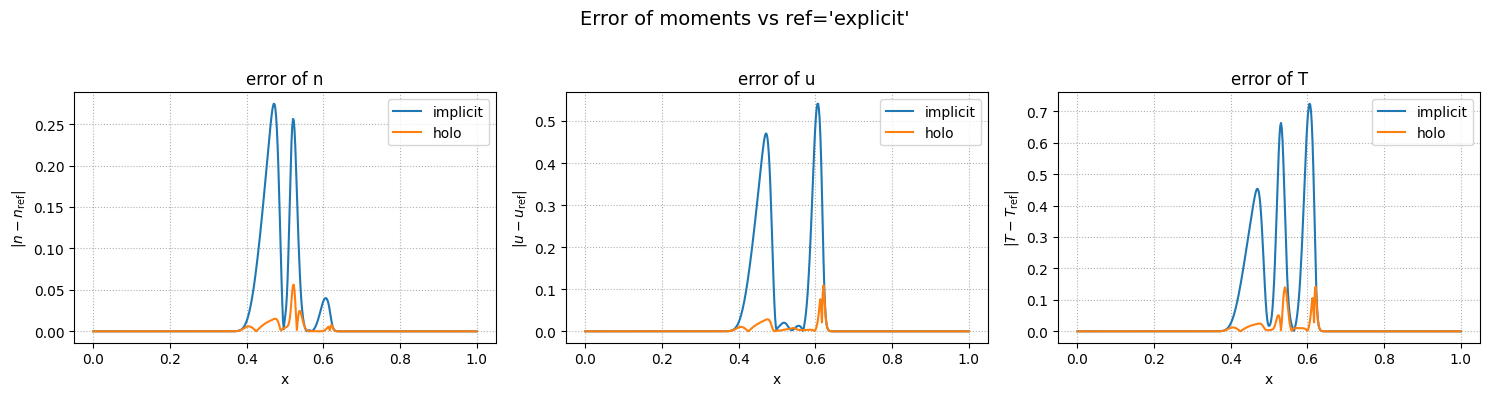

In [14]:
tmp = sim_cross.load_benchmark_results("cross_test.pkl")
sim_cross.plot_cross_scheme_results(tmp, ref_scheme="explicit")